In [1]:
# load the library
library(CAVAanalytics)
# ignore this line, it is just to visualize the plots in this notebook
Sys.setenv("PROJ_LIB" = "/opt/conda/envs/cava/share/proj")

Loading required package: loadeR.java

Loading required package: rJava

Java version 17x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready



## 1st step: data loading
Loading the data is always the first step of CAVAanalytics. It is the second step that changes the most and it is where we perform different analyses.
The load_data functions allow users to load netcdf file stored locally (specific data structure has to be followed, for more info type ?loade_data) or remotely. In this notebook we will use CORDEX-CORE data stored remotely at the University of Cantabria server. This is one of the main feature of CAVAanalytics

In [2]:
# Type ?load_data to explore all options

exmp1 <- load_data(country = "Sudan", path.to.data = "CORDEX-CORE", variable = "pr", years.proj = 2020:2050, 
                   years.hist = 2000, domain = "AFR-22",  aggr.m="sum")


ℹ Accessing inventory

✔ Accessing inventory s]



ℹ Downloading CORDEX-CORE data (18 simulations). This might take a while. Using…

✔ Downloading CORDEX-CORE data (18 simulations). This might take a while. Using…



ℹ Downloaded 136.49 MB

ℹ Binding members and checking temporal consistency

✔ Binding members and checking temporal consistency [6.4s]



ℹ Precipitation has been converted into mm/day

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message:
“Failed to locate timezone database”


## 2nd step: trends
trends is one of the function available in step 2 of the CAVAanalytics framework. As the name gives away, it is used to look at trends (both for observation or future projections). This function needs at least 25 years of data to run otherwise it will throw an error. The main issue that this function try to address is how to calculate a global p value for a multimodel ensemble. This function uses a form of multivariate statistic based on design inference to address the problem. Full documentation of how this works can be found in [Wang et al., 2012 ](https://besjournals.onlinelibrary.wiley.com/doi/10.1111/j.2041-210X.2012.00190.x). More of this when we plot the results

In [4]:
exmp1_trends <- trends(exmp1, season=1:12, historical=F)

ℹ  trends, projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of yearly increase in total  pr

ℹ Processing rcp26

ℹ Applying multivariate linear regression to the ensemble. Global test statisti…

✔ Applying multivariate linear regression to the ensemble. Global test statisti…



ℹ Processing rcp85

ℹ Applying multivariate linear regression to the ensemble. Global test statisti…

✔ Applying multivariate linear regression to the ensemble. Global test statisti…



ℹ  Processing rcp26

ℹ Applying linear regression to each ensemble member. P-value calculated using …

✔ Applying linear regression to each ensemble member. P-value calculated using …



ℹ  Processing rcp85

ℹ Applying linear regression to each ensemble member. P-value calculated using …

✔ Applying linear regression to each ensemble member. P-value calculated using …



Warning message:
“There were 28 warnings in `dplyr::mutate()`.
The first warning was:
ℹ In argument: `ens_spat = purrr::map2(...)`.
Caused by warning:

## 3rd step: plotting
Plotting allows us to visualize the results of step2 in a very flexible way. There are few additional options for plotting when a trend analysis is performed in step 2. 


ℹ  Visualizing ensemble 

ℹ Plotting

✔ Plotting s]



ℹ  Visualizing individual members 

ℹ Plotting

✔ Plotting s]





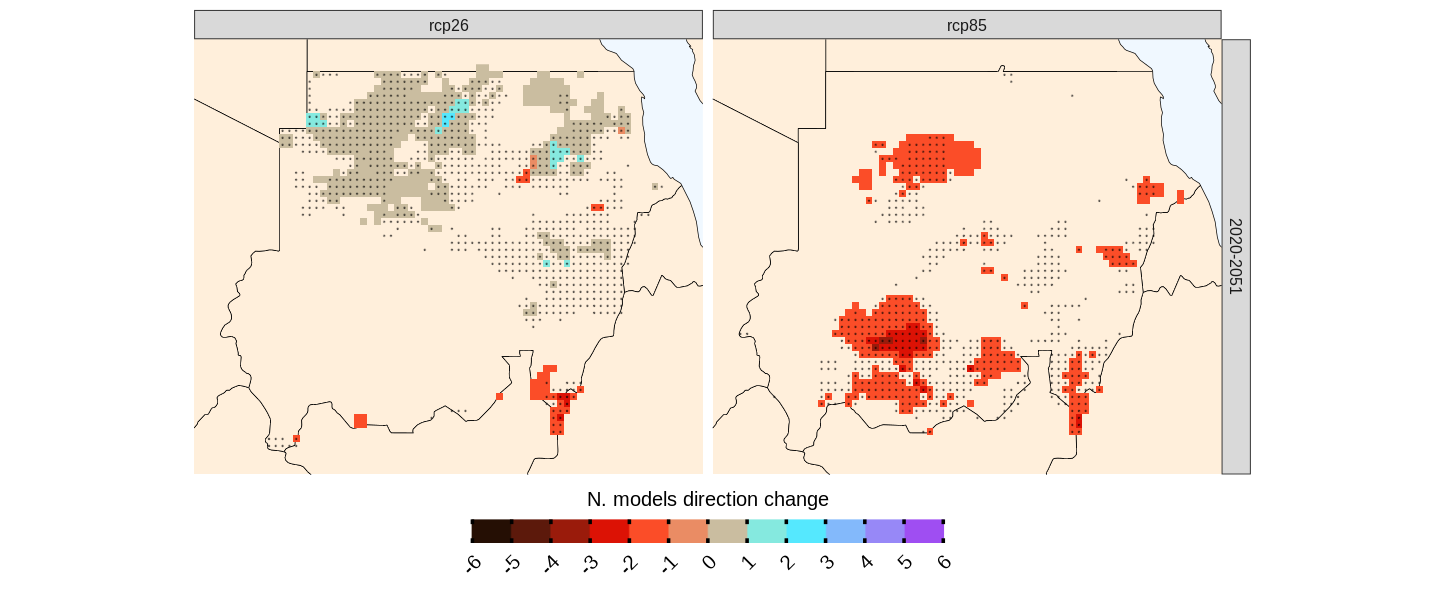

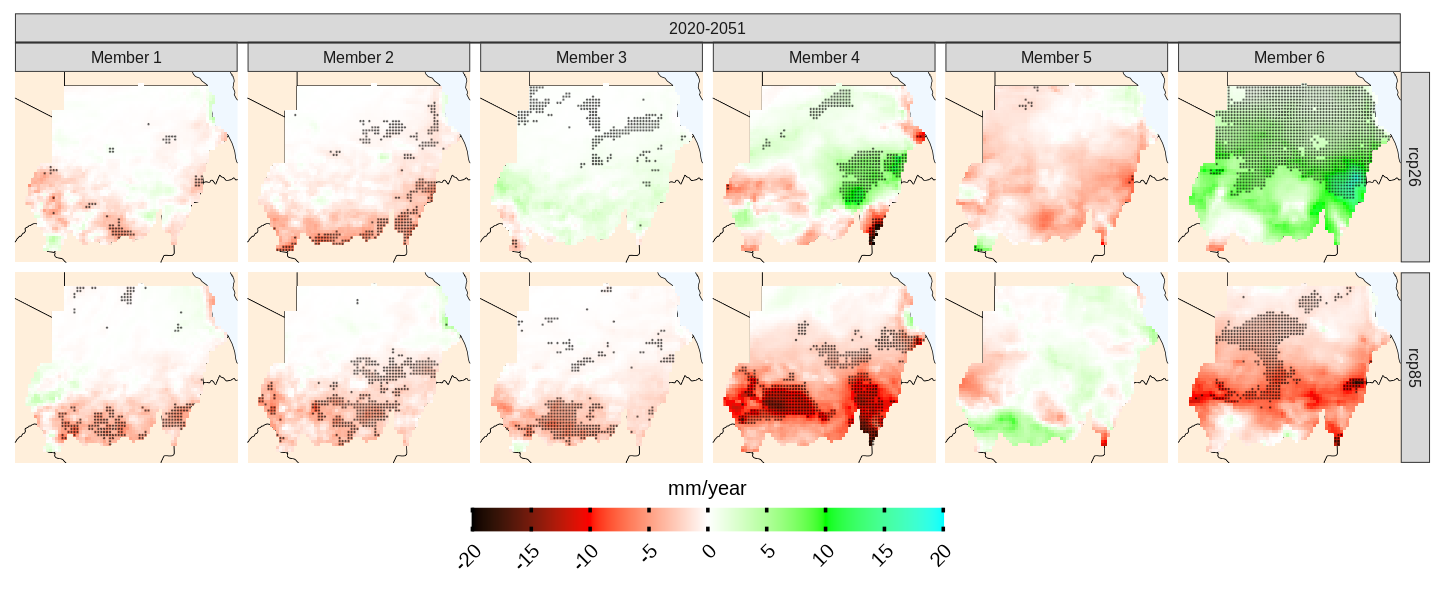

In [7]:
# here we are plotting the overall direction of change (increase or decrease) in total precipitation 
# based on the multimodel ensemble. The black dot is indicating the global p.value calculated based on multivariate linear models
# while the color indicates the number of models which agree on the direction of change
options(repr.plot.width=12, repr.plot.height=5)

plotting(exmp1_trends, ensemble = T, frequencies = F, spatial_aggr=F plot_titles="N. models direction change", 
         palette=c("black", "red", "blue", "purple"), bins=T, n.bins=12)


plotting(exmp1_trends, ensemble = F, frequencies = F, spatial_aggr=F, plot_titles="mm/year",
         legend_range = c(-20,20), palette = c("black", "red", "white", "green", "cyan"))

 What if you want to appreciate spatial temporal differences based on frequencies? You can do this as follow

!  Arguments bins, legend_range, plot_titles and palette are ignored

Picking joint bandwidth of 50.6

Picking joint bandwidth of 50.4



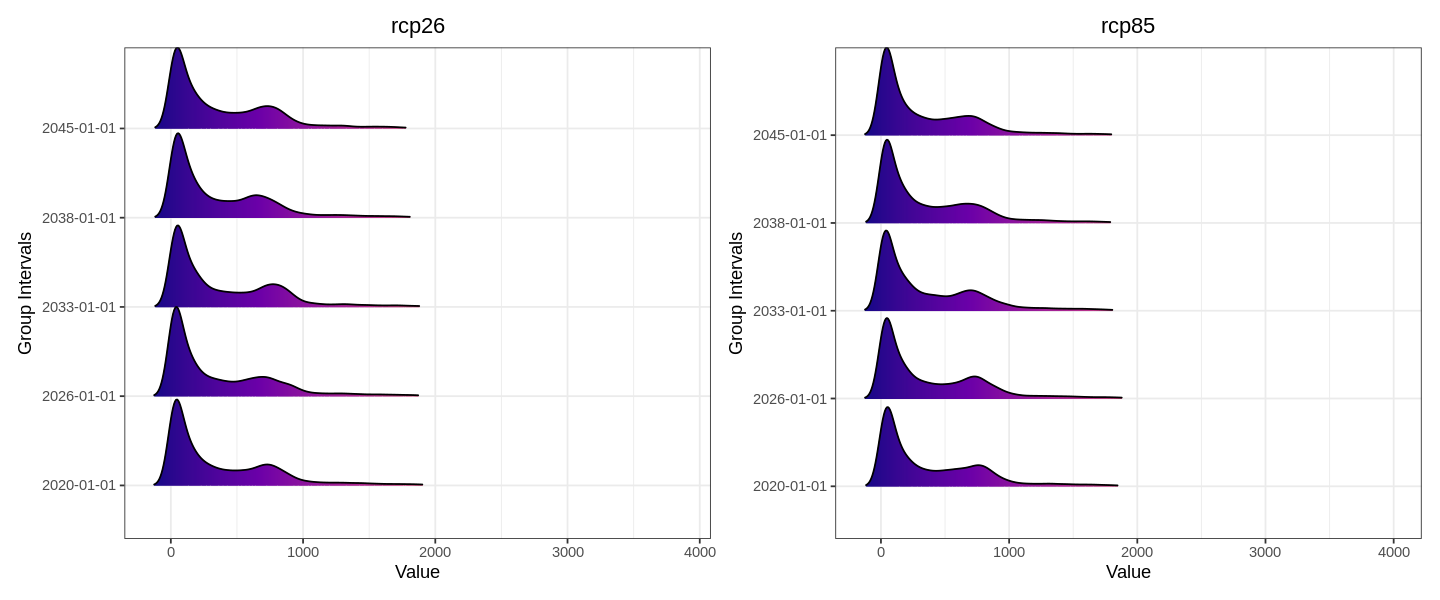

In [9]:
plotting(exmp1_trends, ensemble = TRUE, frequencies = T, n.groups = 5, spatial_aggr=F)

!  Arguments bins, legend_range, plot_titles and palette are ignored

Picking joint bandwidth of 32.6

Picking joint bandwidth of 29.5

Picking joint bandwidth of 19

Picking joint bandwidth of 69.9

Picking joint bandwidth of 63.1

Picking joint bandwidth of 51

Picking joint bandwidth of 32.2

Picking joint bandwidth of 32

Picking joint bandwidth of 18.5

Picking joint bandwidth of 68.6

Picking joint bandwidth of 63

Picking joint bandwidth of 49.2



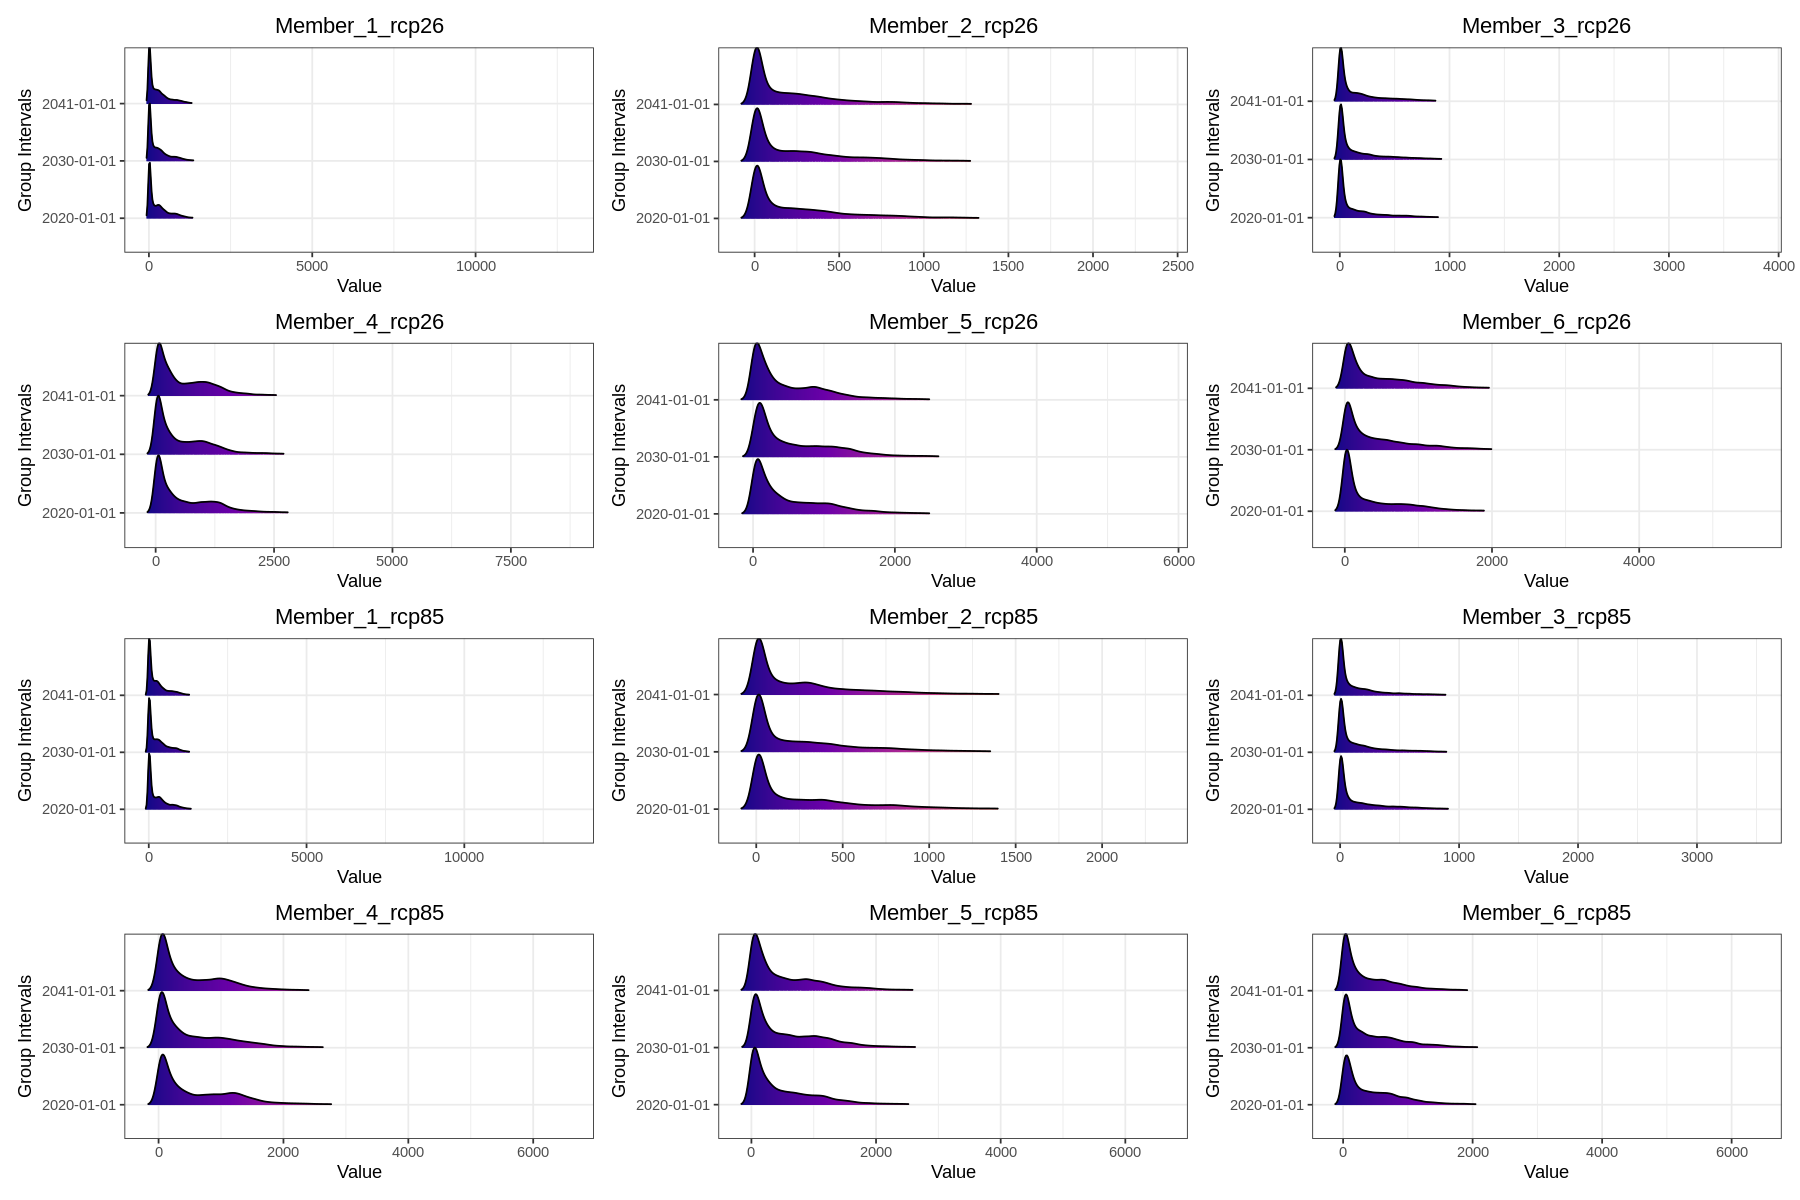

In [11]:
options(repr.plot.width=15, repr.plot.height=10)
plotting(exmp1_trends, ensemble = FALSE, frequencies = T, spatial_aggr=F)

What if we want to see trends for spatially aggregated data?

!  Arguments bins and legend_range are ignored



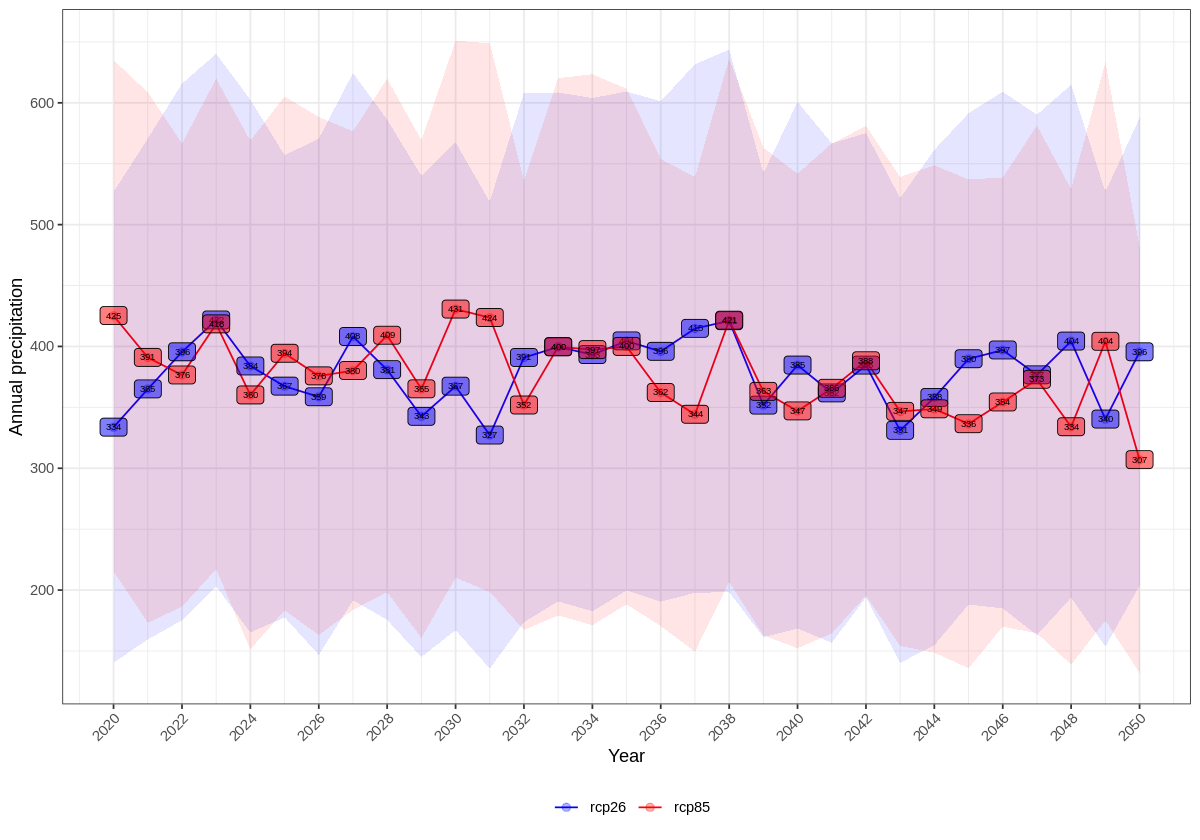

In [16]:
options(repr.plot.width=10, repr.plot.height=7)
plotting(exmp1_trends, ensemble = TRUE, frequencies = FALSE,
         spatial_aggr=T, plot_titles = "Annual precipitation", palette=c("blue", "red"))

!  Arguments bins and legend_range are ignored



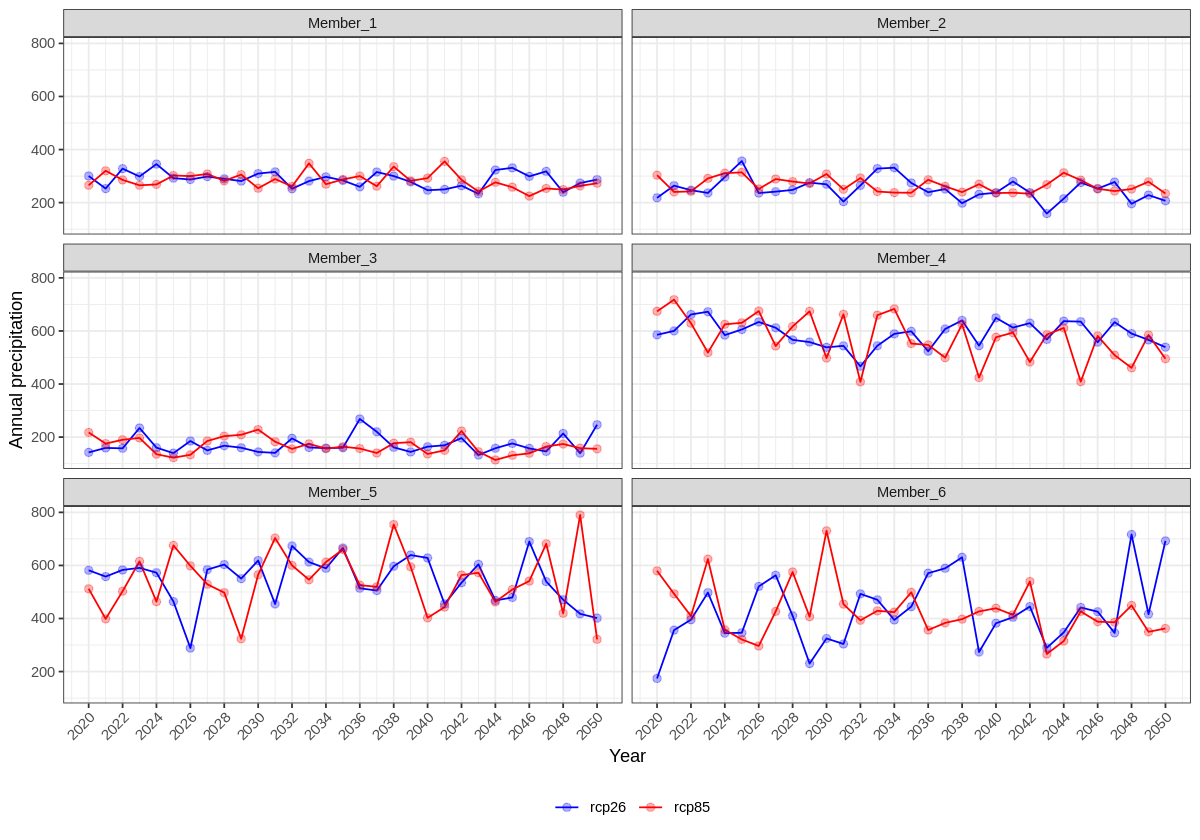

In [17]:
options(repr.plot.width=10, repr.plot.height=7)
plotting(exmp1_trends, ensemble = FALSE, frequencies = FALSE,
         spatial_aggr=T, plot_titles = "Annual precipitation", palette=c("blue", "red"))

## What happen if we want to perform a calculation on a large area?
The above functions are quite memory intensive. This of course depends on how many years of data you are loading but also on the size of the region. If you are using your normal laptop, it is likely that you have available only 16Gb RAM. Even the above operations could potentially fail. You can monitor your RAM usage using htop or bashtop in linux OS.

To solve this issue, we combined the load_data step with the 2nd step so that the loading and calculations are performed sequentially on small chunks of spatial data. At the end of the process, the small rasters are merged together. Because the operations is performed sequentially, while slow, it saves memory allowing users to analyse entire CORDEX domains

In [12]:
exmp1_chunk <- load_data_and_trends(path.to.data = "CORDEX-CORE", variable = "pr", years.proj = 2020:2050, 
                   years.hist = 2000, domain = "AFR-22", 
                xlim = c(10,50), ylim = c(-10,10), aggr.m="sum", season=1:12, 
                                        chunk.size=10)

✔ Loading and processing spatial CHUNK_1_1 . Coordinates  xlim= 9.75,20  ylim= -10.25,0

✔ Loading and processing spatial CHUNK_1_2 . Coordinates  xlim= 9.75,20  ylim= -0.25,10

✔ Loading and processing spatial CHUNK_2_1 . Coordinates  xlim= 19.75,30  ylim= -10.25,0

✔ Loading and processing spatial CHUNK_2_2 . Coordinates  xlim= 19.75,30  ylim= -0.25,10

✔ Loading and processing spatial CHUNK_3_1 . Coordinates  xlim= 29.75,40  ylim= -10.25,0

✔ Loading and processing spatial CHUNK_3_2 . Coordinates  xlim= 29.75,40  ylim= -0.25,10

✔ Loading and processing spatial CHUNK_4_1 . Coordinates  xlim= 39.75,50  ylim= -10.25,0

✔ Loading and processing spatial CHUNK_4_2 . Coordinates  xlim= 39.75,50  ylim= -0.25,10

ℹ Merging rasters

✔ Merging rasters s]





ℹ  Visualizing ensemble 

ℹ Plotting

✔ Plotting s]





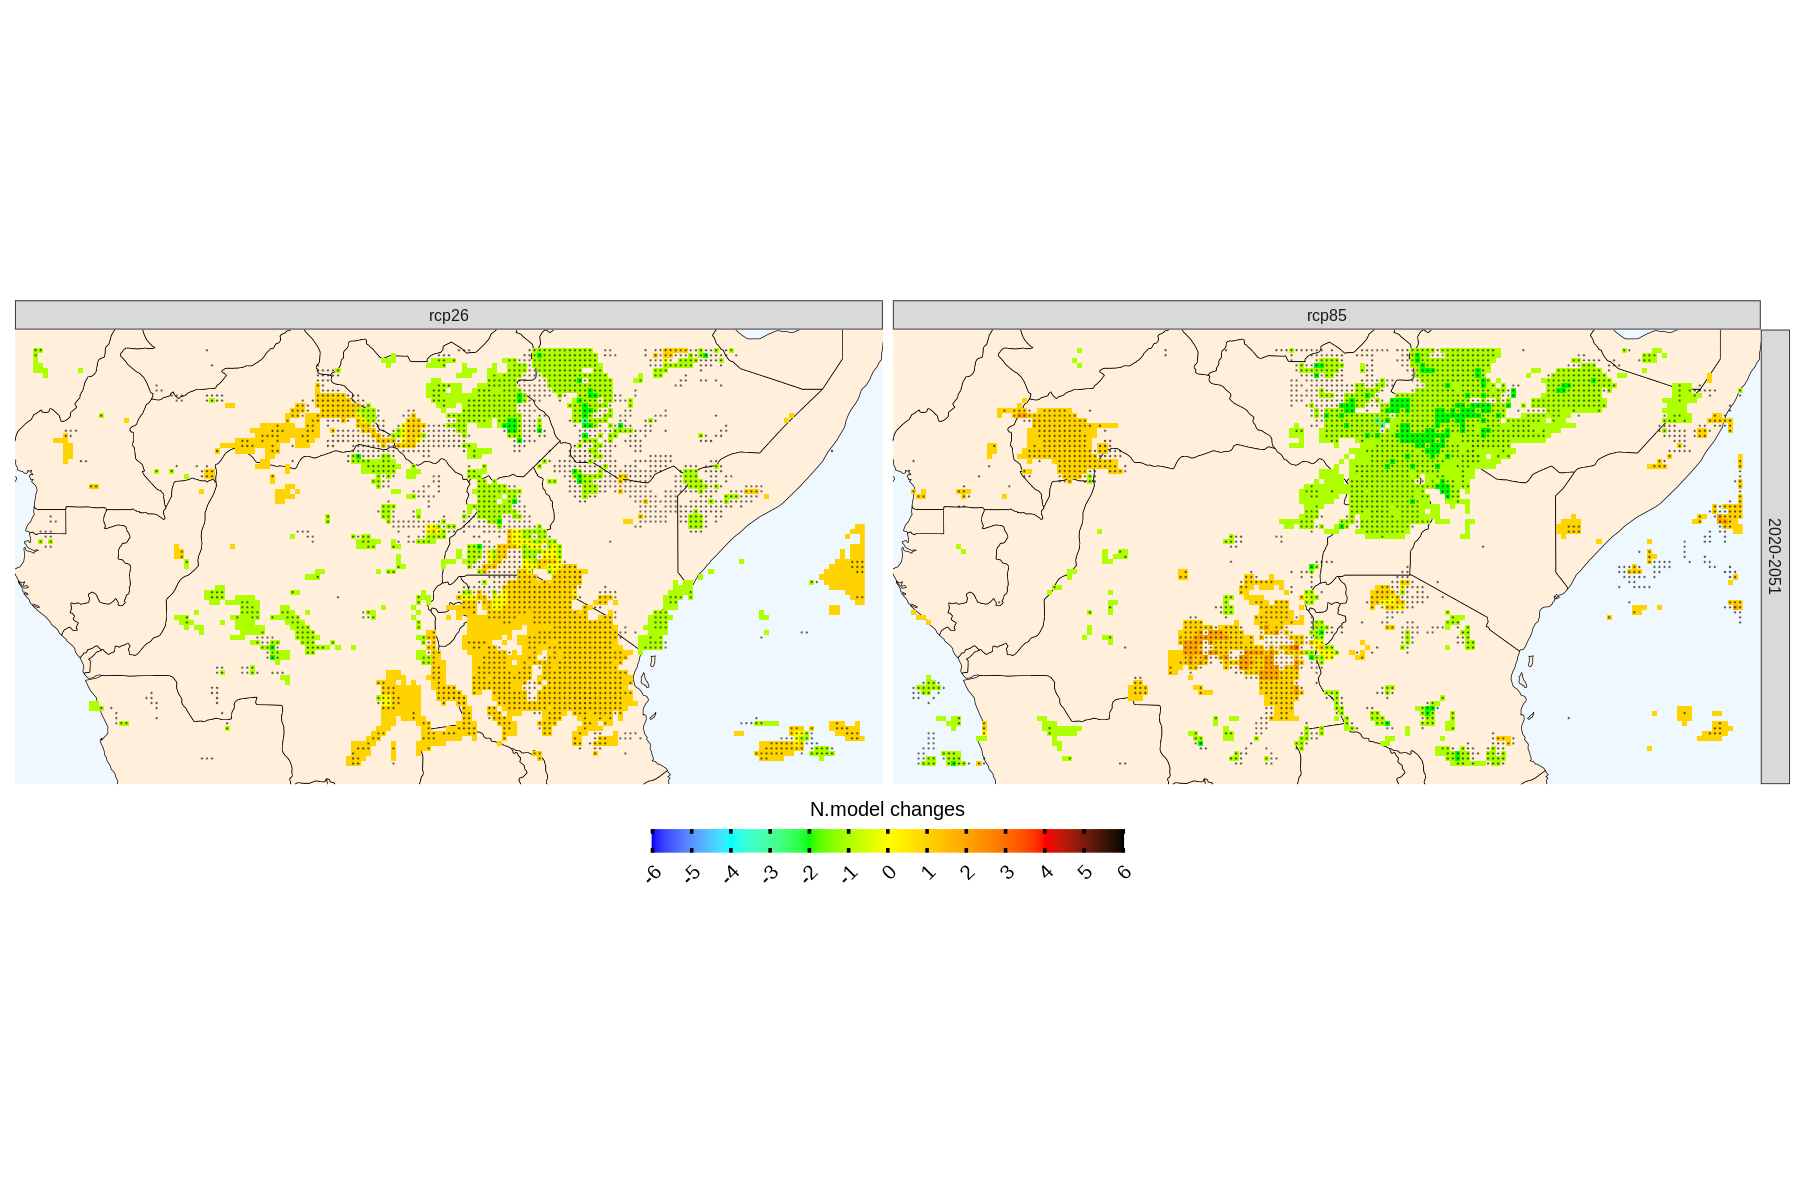

In [13]:
plotting(exmp1_chunk, ensemble = T, frequencies = F, plot_titles = "N.model changes")